# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

In [1]:
import matplotlib.pyplot as plt
import cv2

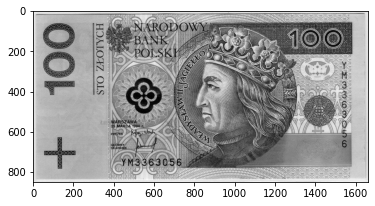

In [2]:
zloty = plt.imread("100zloty.jpg")
zloty = cv2.cvtColor(zloty, cv2.COLOR_BGR2GRAY)
plt.imshow(zloty, cmap='gray')

[]

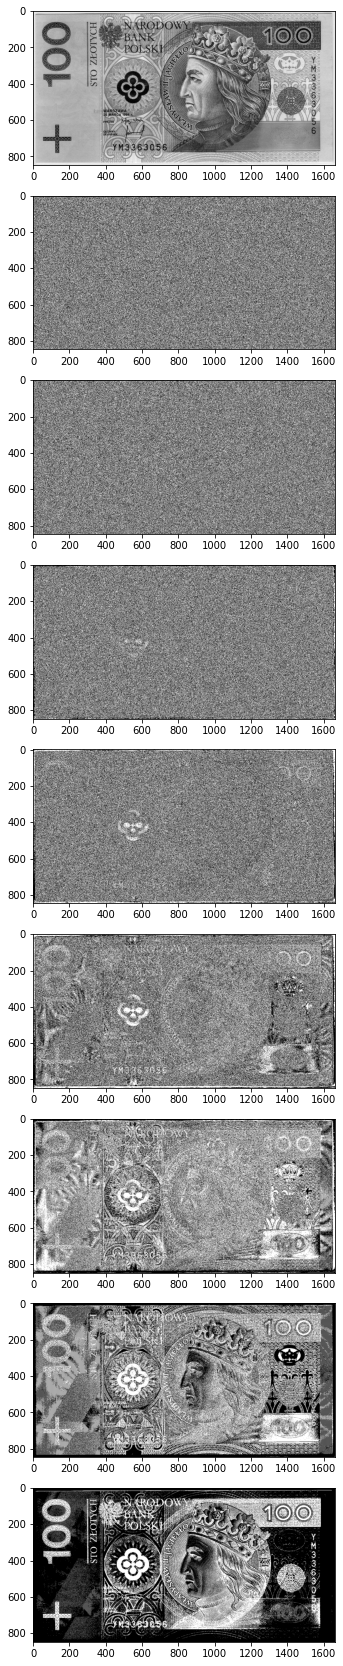

In [3]:
def get_n_bit_from_x_number(n, x):
    bin_x = bin(x)[2:]
    bin_x = (8-len(bin_x)) * '0' + bin_x

    return int(bin_x[7-n])

# 847 x 1661
    
bit_pics = [[[0 for _j in range(1661)] for _i in range(847)] for _ in range(8)]

for i, l in enumerate(zloty):
    for j, p in enumerate(l):
        for k in range(8):
            bit_pics[k][i][j] = get_n_bit_from_x_number(k, p)
               

f, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(9, 1, figsize=(30,30))
    
ax0.imshow(zloty, cmap='gray')
ax1.imshow(bit_pics[0], cmap=plt.cm.binary)
ax2.imshow(bit_pics[1], cmap=plt.cm.binary)
ax3.imshow(bit_pics[2], cmap=plt.cm.binary)
ax4.imshow(bit_pics[3], cmap=plt.cm.binary)
ax5.imshow(bit_pics[4], cmap=plt.cm.binary)
ax6.imshow(bit_pics[5], cmap=plt.cm.binary)
ax7.imshow(bit_pics[6], cmap=plt.cm.binary)
ax8.imshow(bit_pics[7], cmap=plt.cm.binary)

plt.plot()

# plt.imshow(zloty)

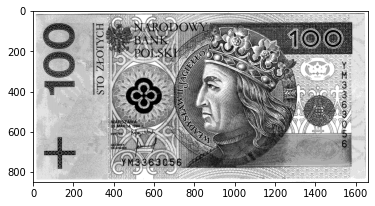

In [4]:
rek1 = [[0 for _j in range(1661)] for _i in range(847)]

for i, l in enumerate(zloty):
    for j, p in enumerate(l):
        rek1[i][j] = ((bit_pics[7][i][j] << 1) + bit_pics[6][i][j]) << 6
        
plt.imshow(rek1, cmap='gray')

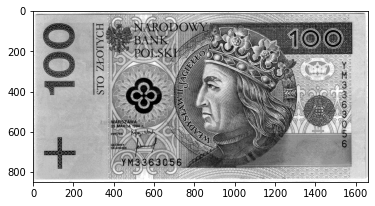

In [5]:
rek2 = [[0 for _j in range(1661)] for _i in range(847)]

for i, l in enumerate(zloty):
    for j, p in enumerate(l):
        rek2[i][j] = ((((bit_pics[7][i][j] << 1) + bit_pics[6][i][j]) << 1) + bit_pics[5][i][j]) << 5
        
plt.imshow(rek2, cmap='gray')

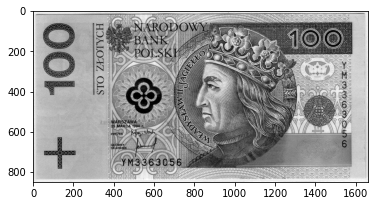

In [6]:
rek3 = [[0 for _j in range(1661)] for _i in range(847)]

for i, l in enumerate(zloty):
    for j, p in enumerate(l):
        rek3[i][j] = ((((((bit_pics[7][i][j] << 1) + bit_pics[6][i][j]) << 1) + bit_pics[5][i][j]) << 1 ) + bit_pics[4][i][j]) << 4
        
plt.imshow(rek3, cmap='gray')